# **Analisis hubungan antara harga game dan rentang jumlah pemilik menggunakan Algoritma Random forest dengan tuning RandomizedSearchCv**

Nama: Alief Khairul Fadzli

Nim: 22.11.4983

https://www.kaggle.com/datasets/nikdavis/steam-store-games



# **LOAD DATASET**

In [3]:
import pandas as pd

file_path = '/content/drive/MyDrive/Colab Notebooks/BigData & Data Maining Sem 5/UAS/steam.csv'
steam_data = pd.read_csv(file_path)

print("Info Dataset:")
print(steam_data.info())
print("\nPreview Data:")
print(steam_data.head())


Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  object 
 3   english           27075 non-null  int64  
 4   developer         27074 non-null  object 
 5   publisher         27061 non-null  object 
 6   platforms         27075 non-null  object 
 7   required_age      27075 non-null  int64  
 8   categories        27075 non-null  object 
 9   genres            27075 non-null  object 
 10  steamspy_tags     27075 non-null  object 
 11  achievements      27075 non-null  int64  
 12  positive_ratings  27075 non-null  int64  
 13  negative_ratings  27075 non-null  int64  
 14  average_playtime  27075 non-null  int64  
 15  median_playtime   27075 non-null  int64  
 16  owners            27075 no

In [4]:
import pandas as pd
file_path = '/content/drive/MyDrive/Colab Notebooks/BigData & Data Maining Sem 5/UAS/steam.csv'
steam_data = pd.read_csv(file_path)
display(steam_data)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,1065230,Room of Pandora,2019-04-24,1,SHEN JIAWEI,SHEN JIAWEI,windows,0,Single-player;Steam Achievements,Adventure;Casual;Indie,Adventure;Indie;Casual,7,3,0,0,0,0-20000,2.09
27071,1065570,Cyber Gun,2019-04-23,1,Semyon Maximov,BekkerDev Studio,windows,0,Single-player,Action;Adventure;Indie,Action;Indie;Adventure,0,8,1,0,0,0-20000,1.69
27072,1065650,Super Star Blast,2019-04-24,1,EntwicklerX,EntwicklerX,windows,0,Single-player;Multi-player;Co-op;Shared/Split ...,Action;Casual;Indie,Action;Indie;Casual,24,0,1,0,0,0-20000,3.99
27073,1066700,New Yankee 7: Deer Hunters,2019-04-17,1,Yustas Game Studio,Alawar Entertainment,windows;mac,0,Single-player;Steam Cloud,Adventure;Casual;Indie,Indie;Casual;Adventure,0,2,0,0,0,0-20000,5.19


In [5]:
import pandas as pd
import numpy as np
import re
import itertools
import math

In [6]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BigData & Data Maining Sem 5/UAS/steam.csv')


# **PRE-PROCESSING**

In [7]:
def remove_non_english(df):
    df = df[df['english'] == 1].copy()
    df = df[~df['name'].str.contains('[^\u0001-\u007F]{3,}')]
    df = df.drop('english', axis=1)

    return df

In [8]:
def calc_rating(row):
    pos = row['positive_ratings']
    neg = row['negative_ratings']

    total_reviews = pos + neg
    average = pos / total_reviews
    score = average - (average*0.5) * 2**(-math.log10(total_reviews + 1))

    return score * 100

In [9]:
def get_unique(series):
    return set(list(itertools.chain(*series.apply(lambda x: [c for c in x.split(';')]))))


In [10]:
def process_cat_gen_tag(df):
    cat_cols = get_unique(df['categories'])
    cat_cols = ['Multi-player', 'Single-player']
    for col in sorted(cat_cols):
        col_name = re.sub(r'[\s\-\/]', '_', col.lower())
        col_name = re.sub(r'[()]', '', col_name)

        df[col_name] = df['categories'].apply(lambda x: 1 if col in x.split(';') else 0)
    gen_cols = get_unique(df['genres'])
    gen_cols = [
        'Action', 'Adventure', 'Casual', 'Indie', 'Massively Multiplayer',
        'RPG', 'Simulation', 'Sports', 'Strategy'
    ]
    gen_col_names = []
    for col in sorted(gen_cols):
        col_name = col.lower().replace('&', 'and').replace(' ', '_')
        gen_col_names.append(col_name)

        df[col_name] = df['genres'].apply(lambda x: 1 if col in x.split(';') else 0)
    gen_sums = df[gen_col_names].sum(axis=1)
    df = df[gen_sums > 0].copy()
    df = df.drop(['categories', 'steamspy_tags'], axis=1)

    return df


In [11]:
def pre_process():

    df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BigData & Data Maining Sem 5/UAS/steam.csv')

    df = remove_non_english(df)

    df = df[df['platforms'].str.contains('windows')].drop('platforms', axis=1).copy()

    df['owners'] = df['owners'].str.split('-').apply(lambda x: x[0]).astype(int)

    df['total_ratings'] = df['positive_ratings'] + df['negative_ratings']
    df['rating_ratio'] = df['positive_ratings'] / df['total_ratings']

    df['rating'] = df.apply(calc_rating, axis=1)

    df['release_date'] = pd.to_datetime(df['release_date'])
    df['release_year'] = df['release_date'].apply(lambda x: x.year)

    df = process_cat_gen_tag(df)

    bins = [0, 10000, 100000, 1000000, 10000000, float('inf')]
    labels = [0, 1, 2, 3, 4]  # You can adjust labels as needed
    df['owners_encoded'] = pd.cut(df['owners'], bins=bins, labels=labels)

    return df


In [12]:
data = pre_process()

print('Verifikasi tidak ada nilai yang hilang:')
print(data.isnull().sum().value_counts())

print(data.head())


Verifikasi tidak ada nilai yang hilang:
0        27
1         1
14        1
17680     1
Name: count, dtype: int64
   appid                       name release_date         developer publisher  \
0     10             Counter-Strike   2000-11-01             Valve     Valve   
1     20      Team Fortress Classic   1999-04-01             Valve     Valve   
2     30              Day of Defeat   2003-05-01             Valve     Valve   
3     40         Deathmatch Classic   2001-06-01             Valve     Valve   
4     50  Half-Life: Opposing Force   1999-11-01  Gearbox Software     Valve   

   required_age  genres  achievements  positive_ratings  negative_ratings  \
0             0  Action             0            124534              3339   
1             0  Action             0              3318               633   
2             0  Action             0              3416               398   
3             0  Action             0              1273               267   
4             0  Act

# **EXPLORATORY DATA ANALYSIS**

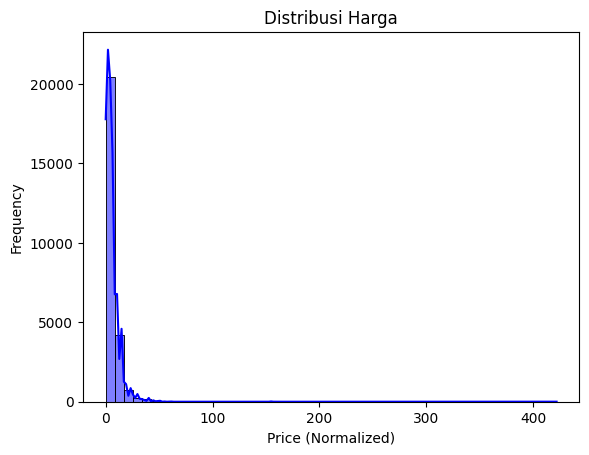

<ipython-input-13-97ffa77c73d2>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='owners_encoded', y='price', data=data, palette='coolwarm')


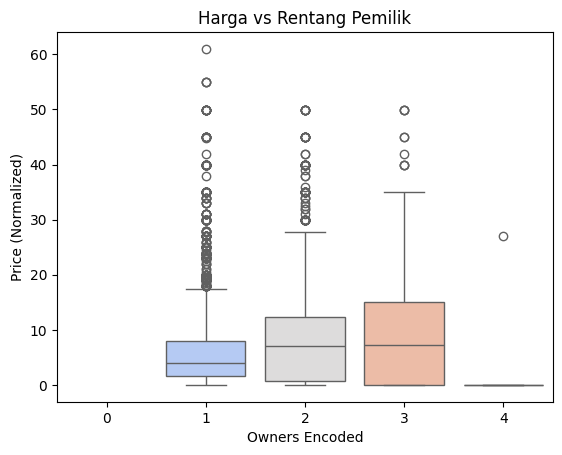

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data['price'], bins=50, kde=True, color='blue')
plt.title('Distribusi Harga')
plt.xlabel('Price (Normalized)')
plt.ylabel('Frequency')
plt.show()

sns.boxplot(x='owners_encoded', y='price', data=data, palette='coolwarm')
plt.title('Harga vs Rentang Pemilik')
plt.xlabel('Owners Encoded')
plt.ylabel('Price (Normalized)')
plt.show()

<ipython-input-14-728b2295751f>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='owners_encoded', data=data, palette='viridis') # Use 'data' instead of 'steam_data'


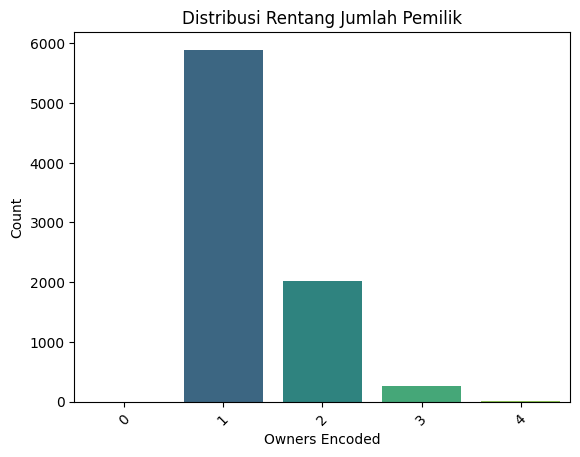

In [14]:
sns.countplot(x='owners_encoded', data=data, palette='viridis') # Use 'data' instead of 'steam_data'
plt.title('Distribusi Rentang Jumlah Pemilik')
plt.xlabel('Owners Encoded')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<ipython-input-15-5e32bd4aba2f>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='owners_encoded', y='price', data=data, palette='coolwarm')


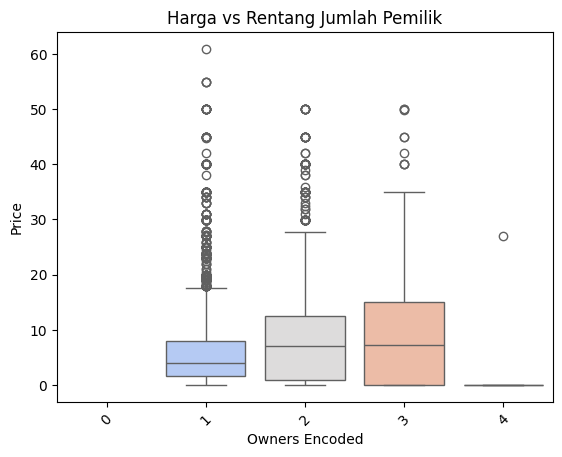

In [15]:
sns.boxplot(x='owners_encoded', y='price', data=data, palette='coolwarm')
plt.title('Harga vs Rentang Jumlah Pemilik')
plt.xlabel('Owners Encoded')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

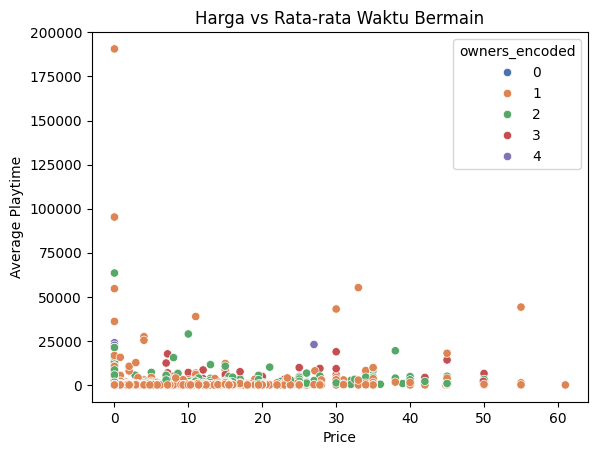

In [16]:
sns.scatterplot(x='price', y='average_playtime', data=data, hue='owners_encoded', palette='deep')
plt.title('Harga vs Rata-rata Waktu Bermain')
plt.xlabel('Price')
plt.ylabel('Average Playtime')
plt.show()

# **SELEKSI FITUR**

In [17]:
from sklearn.model_selection import train_test_split

X = data[['price', 'average_playtime', 'median_playtime']]
y = data['owners_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Shape Data:")
print(f"Train: {X_train.shape}, Test: {X_test.shape}")

Shape Data:
Train: (18102, 3), Test: (7758, 3)


# **MODELING**

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
import numpy as np

X = data[['price', 'average_playtime', 'median_playtime']]  # Use 'data' instead of 'steam_data'
y = data['owners_encoded']  # Use 'data' instead of 'steam_data'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

train_data = pd.concat([X_train, y_train], axis=1)  # Combine X_train and y_train
train_data = train_data.dropna()  # Drop rows with NaN values
X_train = train_data.drop(columns=['owners_encoded'])  # Separate X_train
y_train = train_data['owners_encoded']  # Separate y_train

print("Shape Data:")
print(f"Train: {X_train.shape}, Test: {X_test.shape}")

param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=30, cv=3,
                                   n_jobs=-1, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

best_rf = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

Shape Data:
Train: (5736, 3), Test: (7758, 3)
Best Parameters: {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 10}


# **EVALUASI MODEL**

Classification Report:
               precision    recall  f1-score   support

           1       0.81      0.93      0.87      1762
           2       0.56      0.35      0.43       606
           3       0.53      0.27      0.35        75
           4       0.00      0.00      0.00         1

    accuracy                           0.77      2444
   macro avg       0.48      0.39      0.41      2444
weighted avg       0.74      0.77      0.74      2444


Accuracy Score: 0.7684124386252046


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


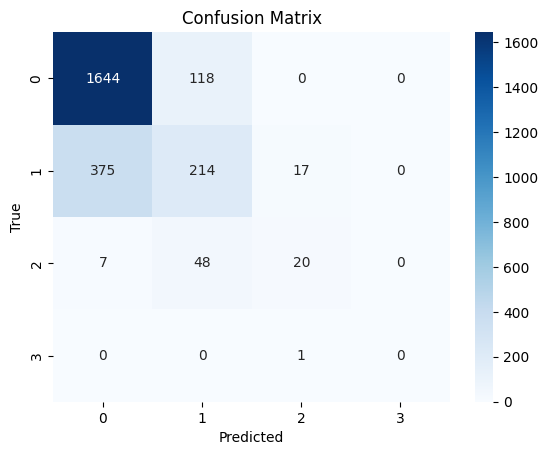

In [19]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

test_data = pd.concat([X_test, y_test], axis=1)  # Combine X_test and y_test
test_data = test_data.dropna()  # Drop rows with NaN values
X_test = test_data.drop(columns=['owners_encoded'])  # Separate X_test
y_test = test_data['owners_encoded']  # Separate y_test

y_pred = best_rf.predict(X_test) # Use the best model for prediction

print("Classification Report:\n", classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy Score:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

<ipython-input-20-385214db076d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='muted')


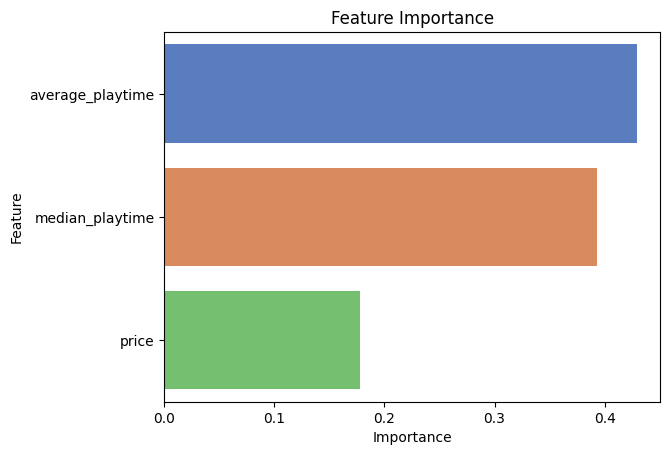

In [20]:
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='muted')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [21]:
import joblib
joblib.dump(best_rf, 'steam_model.joblib')
from google.colab import files
files.download('steam_model.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>